In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import timeit
plt.rcParams['figure.figsize'] = [15, 10]
ds = sio.loadmat('face.mat')

In [2]:
X = ds['X']
l = ds['l'][0]
split = 0.8
W = 46
H = 56
X = pd.DataFrame(X.transpose())
N = X.shape[0]*split
l = pd.DataFrame(l)

In [3]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=(1-split))
# X_bar = np.mean(X, axis=1)
X_train, X_test = np.transpose(X_train.values), np.transpose(X_test.values)
X_bar = np.transpose([np.mean(X_train, axis=1)])

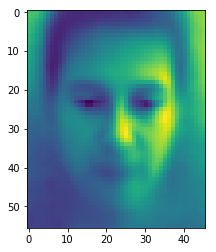

In [4]:
A = np.subtract(X_train,X_bar)
# print(A.shape)
# print(np.transpose(X_train)[0]/255)
mean_img = np.transpose(np.array_split(np.concatenate(X_bar,axis=0)/255, W))
person = np.transpose(np.array_split(np.transpose(X_train)[0]/255, W))
# print(person)
imgplot = plt.imshow(mean_img)

In [5]:

# print(X_bar)
start = timeit.default_timer()
S = np.matmul(A,np.transpose(A))/N
w, v = np.linalg.eig(S)
print(w[0])
print(v[0])

(942846.6143345583+0j)
[ 0.01560432+0.00000000e+00j -0.01412507+0.00000000e+00j
 -0.01493364+0.00000000e+00j ...  0.00016216+6.88340413e-05j
 -0.00053208+0.00000000e+00j -0.00010998+0.00000000e+00j]


c:\users\jack\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


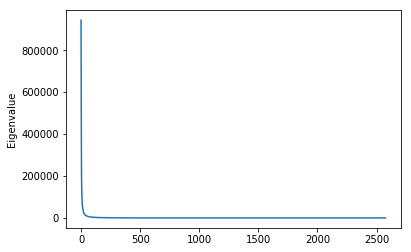

In [6]:
[v for w,v in sorted(zip(w, v), reverse=True)]
plt.plot(w)
plt.ylabel('Eigenvalue')
plt.show()
end = timeit.default_timer()

In [7]:
threshold = 1000 #Edit thos threhold? 


non_zero_w = list(filter(lambda x: x > threshold, w))

non_zero_w = np.asarray(non_zero_w)

print(w.shape)
# print(w[0])
print(non_zero_w.shape)
# print(non_zero_w)

(2576,)
(202,)


In [8]:
print(end-start)
# print(X_bar)

start = timeit.default_timer()
S_LDA = np.matmul(np.transpose(A),A)/N
w_lda, v_lda = np.linalg.eig(S_LDA)

26.104089043


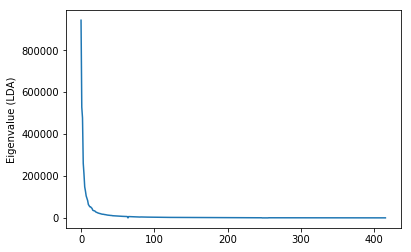

In [9]:
[v_lda for w_lda,v_lda in sorted(zip(w_lda, v_lda), reverse=True)]
plt.plot(w_lda)
plt.ylabel('Eigenvalue (LDA)')
plt.show()
end = timeit.default_timer()

In [10]:
print(end-start)

0.8694655079999976


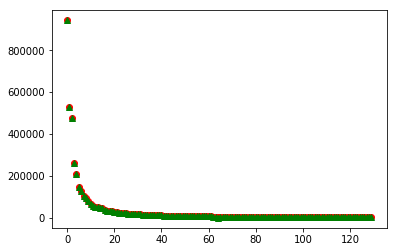

In [11]:
size = 130
plt.plot(np.arange(size),w[:size], 'ro',  np.arange(size), w_lda[:size], 'g^')
plt.show()

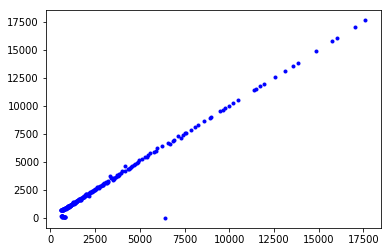

In [12]:
size = 260
plt.plot(w[30:size], w_lda[30:size], 'b.')
plt.show()

In [13]:
diff = w[:100]-w_lda[:100]
value = np.dot(diff,np.transpose(diff))/100
print(value)

(419092.6206482343+0j)


#### Timing taken for sample size. LDA and HDA

In [22]:
start = timeit.default_timer()
S = np.matmul(A,np.transpose(A))/N
w, v = np.linalg.eig(S)
# [v for w,v in sorted(zip(w, v), reverse=True)]
end = timeit.default_timer()
print(end-start)

start = timeit.default_timer()
S_LDA = np.matmul(np.transpose(A),A)/N
w_lda, v_lda = np.linalg.eig(S_LDA)
# [v_lda for w_lda,v_lda in sorted(zip(w_lda, v_lda), reverse=True)]
end = timeit.default_timer()
print(end-start)

23.64550539199996
0.6246604059999754


In [23]:
print(A.shape)

print(w.shape)
print(v.shape)

print(w_lda.shape)
print(v_lda.shape)

(2576, 416)
(2576,)
(2576, 2576)
(416,)
(416, 416)


In [24]:
#the number of non zero elements is the same as the number of images you put in. 
#Chosing M to contain the on zero eigen values equates it to N
#This makes the two methods only differ by the eigen values aquired

th = 0.1


filt = list(filter(lambda x: x > th, w))
filt = np.asarray(filt)

filt_lda = list(filter(lambda x: x > th, w_lda))
filt_lda = np.asarray(filt_lda)

print(filt.shape)
print(filt_lda.shape)

(415,)
(415,)


In [31]:
print(w[400:])
print(w_lda[400:])

[ 2.01571466e+02+0.00000000e+00j  1.99922568e+02+0.00000000e+00j
  2.26588098e+02+0.00000000e+00j ... -3.10536861e-13-1.06134057e-13j
 -4.34273225e-14+0.00000000e+00j -1.64219703e-13+0.00000000e+00j]
[318.83373087 316.34695679 321.00820784 327.71201743 344.5558379
 313.95550473 267.3094182  272.72930841 309.02434396 285.88407308
 278.57124508 280.73932091 284.83441303 279.25834692 298.52438272
 297.83910208]


In [39]:
print(np.sum(w[:415])-np.sum(w_lda[:415]))

print(w_lda[415])


(297.8391020828858+0j)
297.83910208284505
